# Data Preprocessing

Preprocessing data merupakan teknik awal data mining untuk mengubah data mentah atau biasa dikenal dengan raw data yang dikumpulkan dari berbagai sumber menjadi informasi yang lebih bersih dan bisa digunakan untuk pengolahan selanjutnya. Proses ini bisa juga disebut dengan langkah awal untuk mengambil semua informasi yang tersedia dengan cara membersihkan, memfilter, dan menggabungkan data-data tersebut.

3 masalah umum yang diselesaikan dalam tahap preprocessing<br>


1.   Missing Value
2.   Data Noise
3.   Inkonsistensi Data



Selanjutnya ada beberapa teknik untuk melakukan preprocessing data


1.   Exploration Data Analysis (EDA)
2.   Data Wrangling

*   Detecting Outlier
*   Handling Null Values
*   Data Transformation
*   Encoding Categorical Data




**Bismillah, Let's LEARN Together**

# Dataset

Kita akan menggunakan dataset car_feature untuk preprocessing berikutnya. Kita install modul-modul yang diperlukan dan import.

In [1]:
# !pip install pandas-profiling
# !pip install plotly
# !pip install cufflinks

In [1]:
# Import Modul

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          # Visualisasi
import seaborn as sns                    # Visualisasi

sns.set(rc={'figure.figsize':(11.7,8.27)})

Kita akan menggunakan daraset Car Feature dan MSRP dari [kaggle](https://www.kaggle.com/CooperUnion/cardataset)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hafidz-sani/Datasets/main/car_feature.csv')

In [4]:
# Menampilkan 5 data teratas
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Menampilkan 5 data terbawah
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## Membersihkan String pada Columns dan Values

Setelah melihat gambaran datanya, kita bisa melihat nama variabel atau kolom tidak sesuai yang kita harapkan. Masih terdapat uppercase, dan terdapat whitespace. Maka dari itu, kita perlu konversi string kolom sesuai yg ingin kita harapkan, yaitu semua dalam lowercase serta tidak ada whitespace.

In [6]:
# Melakukan lowercase dan mereplace " " dengan "_" pada semua nama kolom

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Membersihkan data kategori pada dataset

In [7]:
"""
Membuat list dari nama kolom bertipe kategori/object
"""

categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
"""
Membersihkan data kategori pada dataset
"""

for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploration Data Analysis (EDA)

Dalam statistik, analisis data eksplorasi merupakan pendekatan yang bertujuan menganalisis dataset untuk meringkas atau menyimpulkan karakteristik utama, termasuk menggunakan metode visual. Bisa menggunakan model statistika, namun sejatinya EDA bertujuan untuk melihat apa data bisa memberitahukan model atau hipotesis yang tepat untuk diujikan selanjutnya.

## EDA dengan Pandas

Secara instan, kita bisa menggunakan pandas-profiling. Namun kadang kita teknik yang lebih rinci, maka kita tidak bisa menggunakan pandas-profiling. Kita bisa menggunakan modul pandas untuk melakukan eksplorasi, manipulasi data.

In [9]:
# Untuk melihat dimensi/ukuran dari data, gunakan atribut shape

df.shape

(11914, 16)

Kita bisa melihat, bahwa data kita terdiri dari 16 variabel dengan jumlah record 11914

In [10]:
# Untuk melihat tipe data tiap variabel

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
# Untuk melihat info/gambaran umum dari data, bisa menggunakan method info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

Diketahui bahwa variabel 'Engine HP', 'Engine Fuel Type', dan beberapa lainnya memiliki missing value. Kita juga bisa melihat variabel data kita terdiri dari tipe object, float dan int.

In [12]:
# Melihat ringkasan statistik dari dataset

df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


fungsi describe() akan memperlihatkan ringkasan statistik dari data. Maka dari itu, data yang diringkas hanya yang bertipe numerik. 

In [13]:
# Untuk melihat jumlah missing value tiap variabel

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
# Untuk melihat jumlah nilai unik tiap variabel

df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [15]:
# Untuk melihat n data terbesar berdasarkan variabel tertentu

max_msrp = df.nlargest(5, 'msrp')
min_msrp = df.nsmallest(5, 'msrp')

display(max_msrp, min_msrp)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11362,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,2065902
11364,bugatti,veyron_16.4,2009,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1705769
8486,lamborghini,reventon,2008,premium_unleaded_(required),650.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,9,1158,1500000
11363,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1500000
6351,maybach,landaulet,2012,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,convertible,16,10,67,1382750


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
21,audi,100,1992,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,midsize,sedan,21,16,3105,2000


In [16]:
# Untuk melihat jumlah baris yang nilainya duplikat

print("Banyaknya data yang duplikat :", df.duplicated().sum())

Banyaknya data yang duplikat : 715


In [18]:
# Untuk melihat meng-count berdasarkan kategori pada variabel tertentu

df['vehicle_size'].value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

## EDA dengan Visualisasi

Untuk melakukan EDA, kita bisa menggunakan visualisasi data seperti barchart, boxplot, heatmap, dll. Dengan melihat visualisasi data, kita bisa dengan mudah melihat gambaran data kita secara keseluruhan melalui pendekatan visual.

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010915A03EC8>,
      dtype=object)

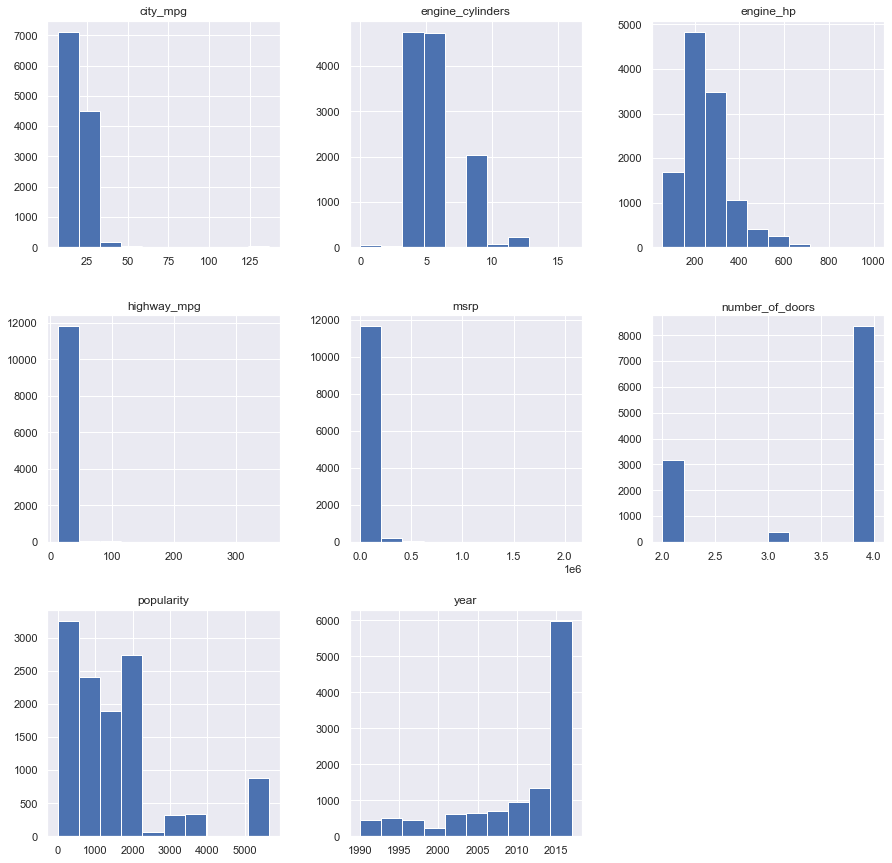

In [19]:
df.hist(figsize=(15,15))

## Distribution Plot

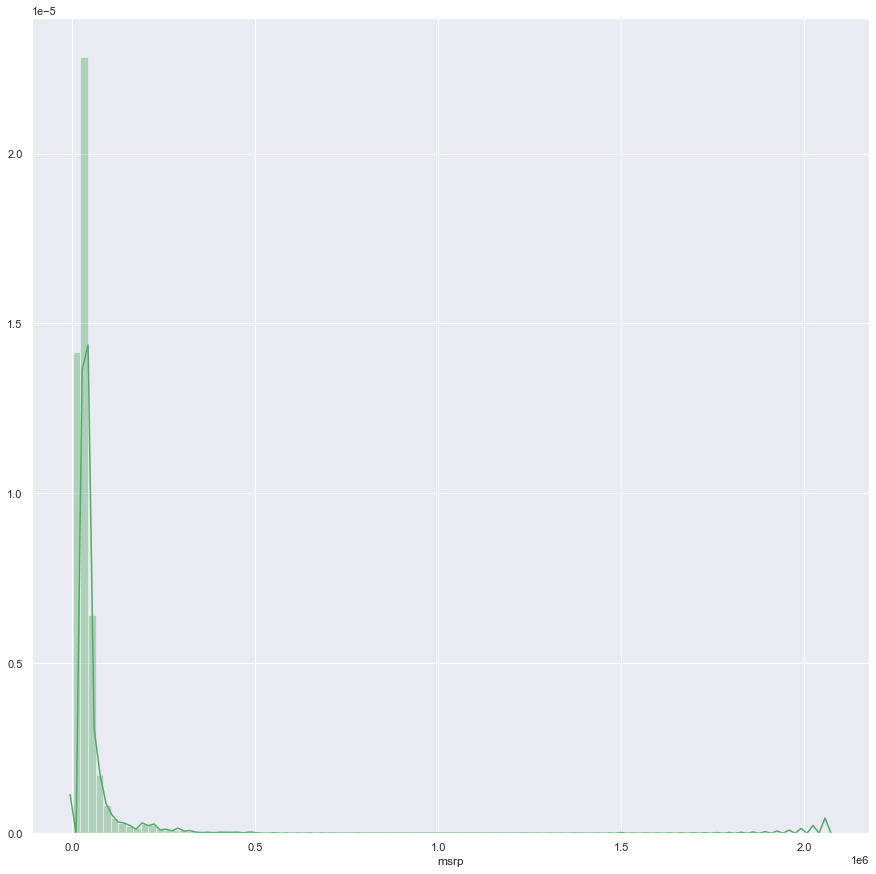

In [21]:
plt.figure(figsize=(15, 15))
sns.distplot(df['msrp'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Countplot

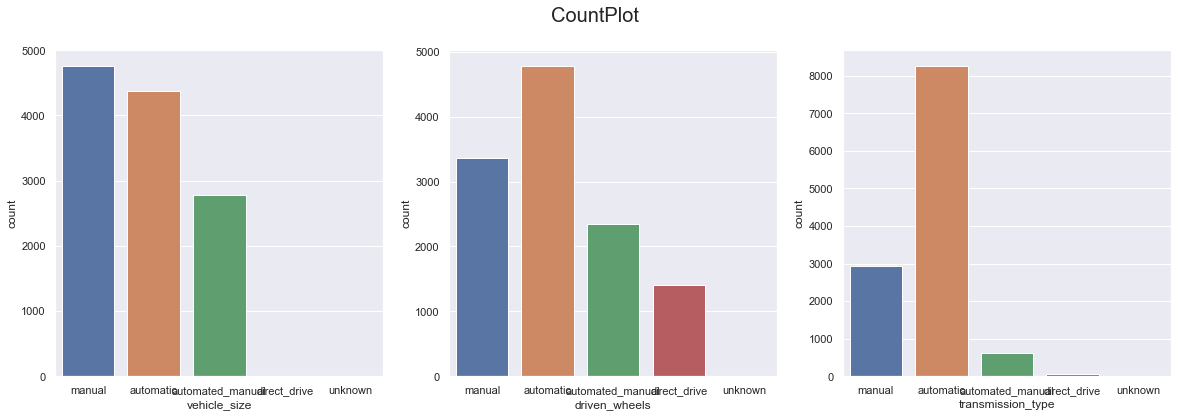

In [22]:
# Melihat jumlah record berdasarkan variabel tertentu melalui countplot
fig, ax = plt.subplots(ncols=3, sharex=True, figsize=(20,6))

fig.suptitle('CountPlot', fontsize=20)


sns.countplot(df['vehicle_size'], ax=ax[0])
sns.countplot(df['driven_wheels'], ax=ax[1])
sns.countplot(df['transmission_type'], ax=ax[2])
plt.show()

## Lineplot

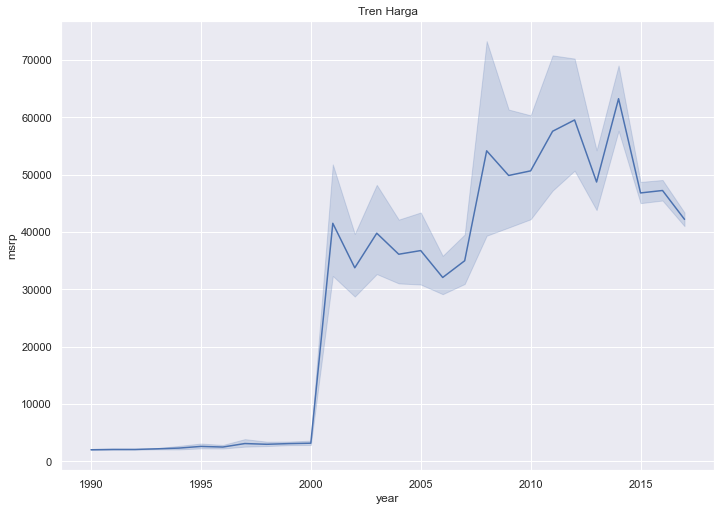

In [23]:
sns.lineplot(df['year'], df['msrp']).set_title('Tren Harga')

plt.show()

## Scatter Plot

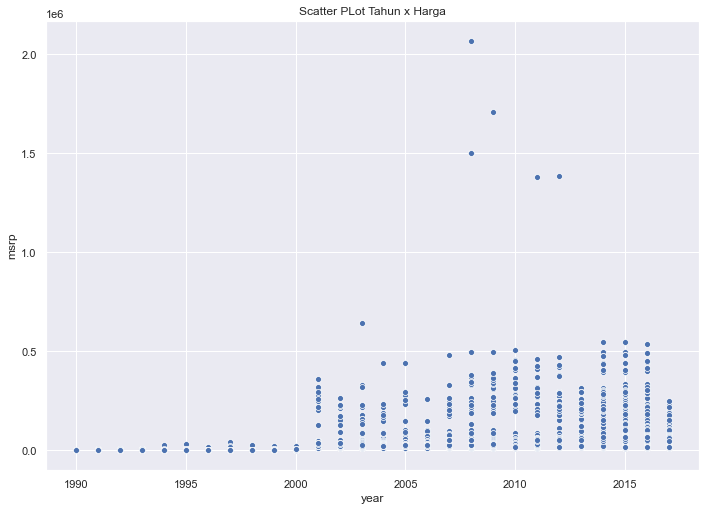

In [24]:
sns.scatterplot(df['year'], df['msrp']).set_title('Scatter PLot Tahun x Harga')

plt.show()

## Correlation

In [25]:
corr = df.corr()

In [26]:
corr

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
engine_hp,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
engine_cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
number_of_doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway_mpg,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city_mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
msrp,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


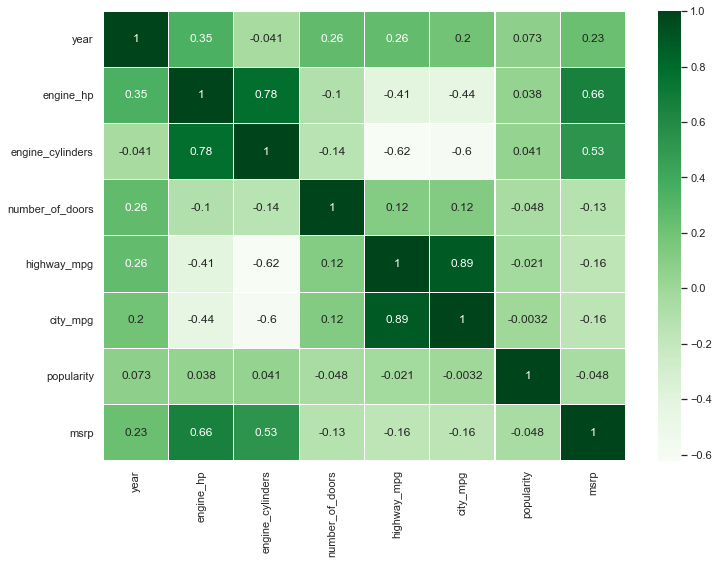

In [27]:
sns.heatmap(corr, cmap='Greens', annot=True, lw=0.1)

## Boxplot

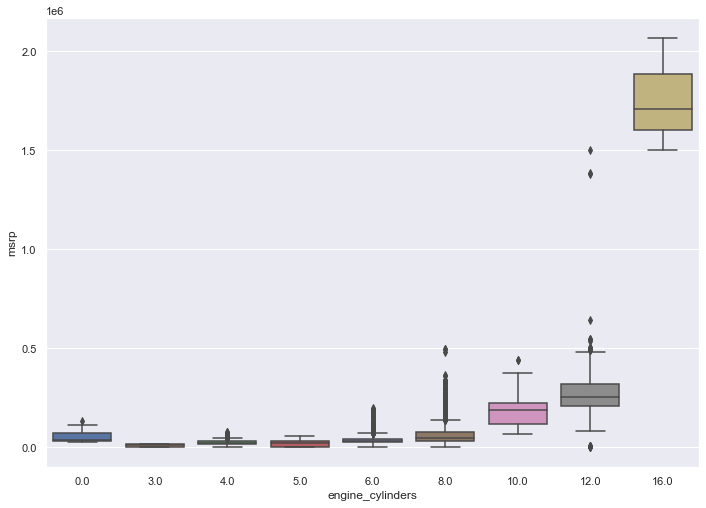

In [30]:
sns.boxplot(x='engine_cylinders', y='msrp', data=df)

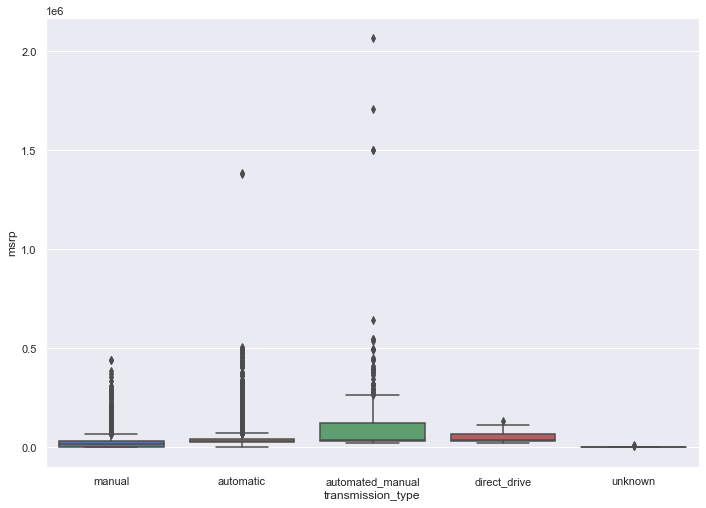

In [85]:
sns.boxplot(x='transmission_type', y='msrp', data=df)

## Mari cek keseluruhan relasi, baik data numerik ataupun kategori terhadap variabel dependen yaitu 'msrp'.

## Distribusi dari Variabel Numerik

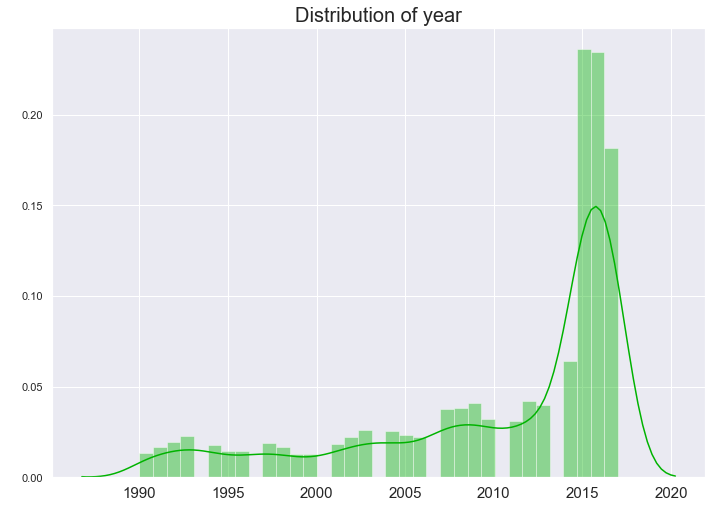

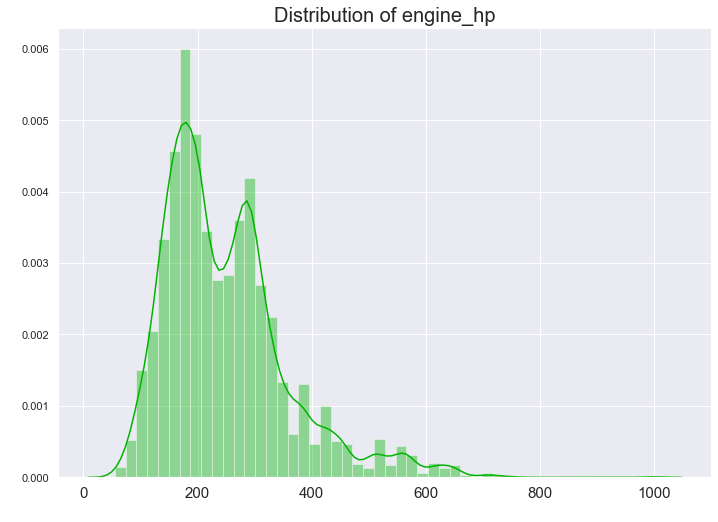

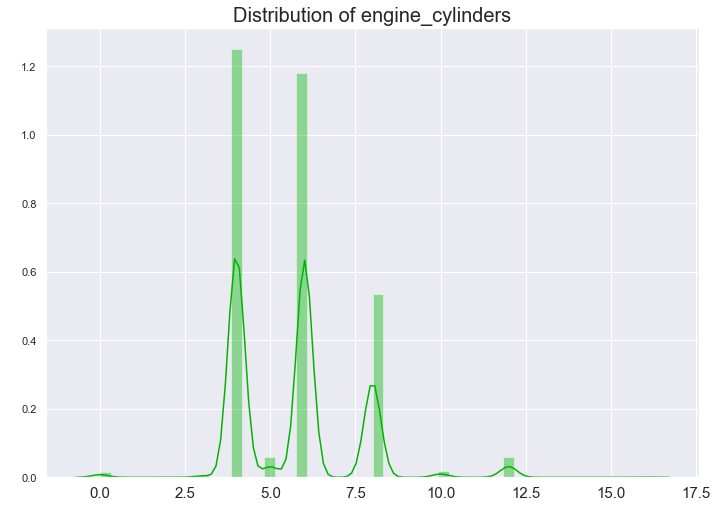

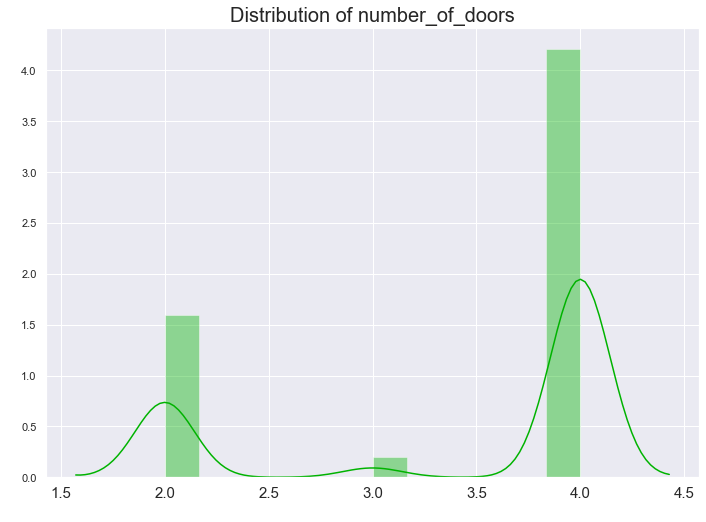

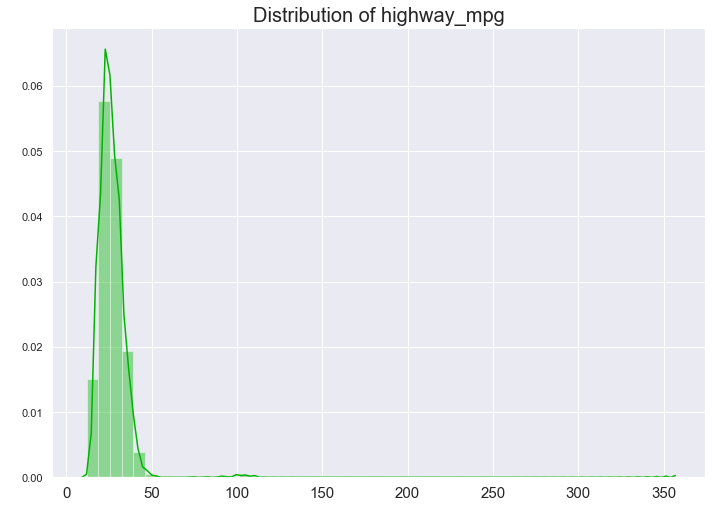

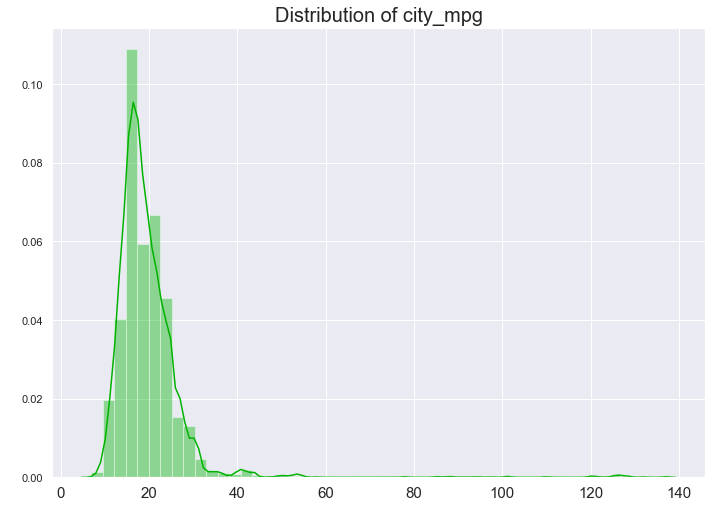

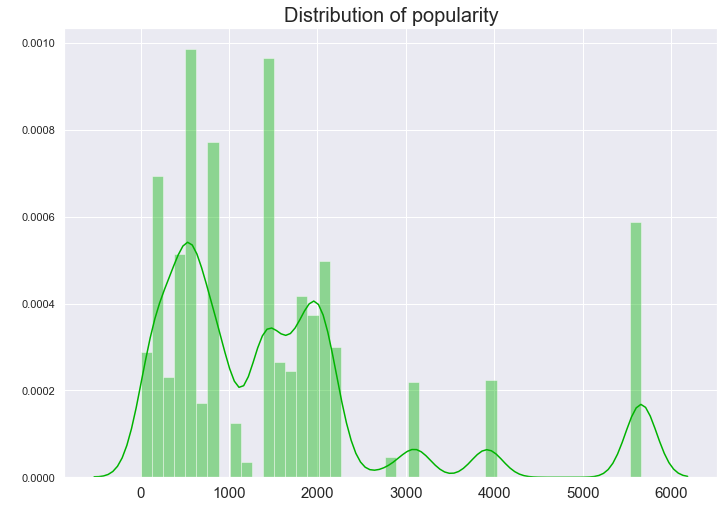

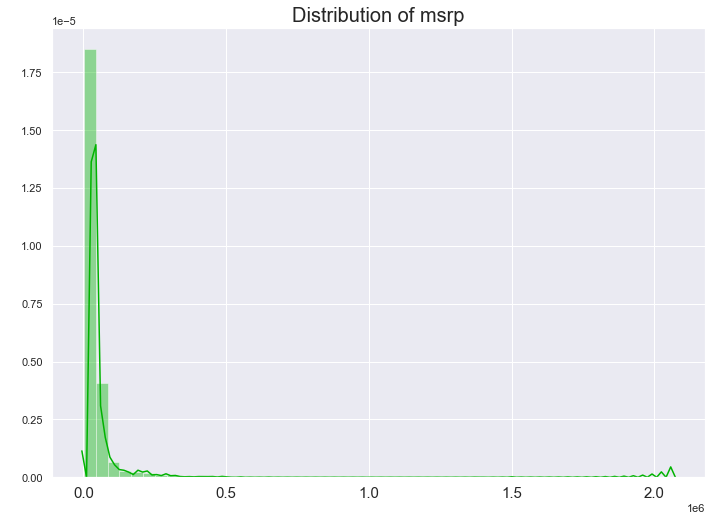

In [32]:
numerical = [col for col in df.columns if col not in categorical] # Mengambil list kolom numerik
for num in numerical:
    ax = sns.distplot(df[num], color = '#00b300')
    plt.title("Distribution of %s" %num, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 15)
    plt.show();
    print('\n')

## Hubungan Variabe Numerik dengan Variabel Dependen "MSRP"

In [33]:
df[numerical].head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


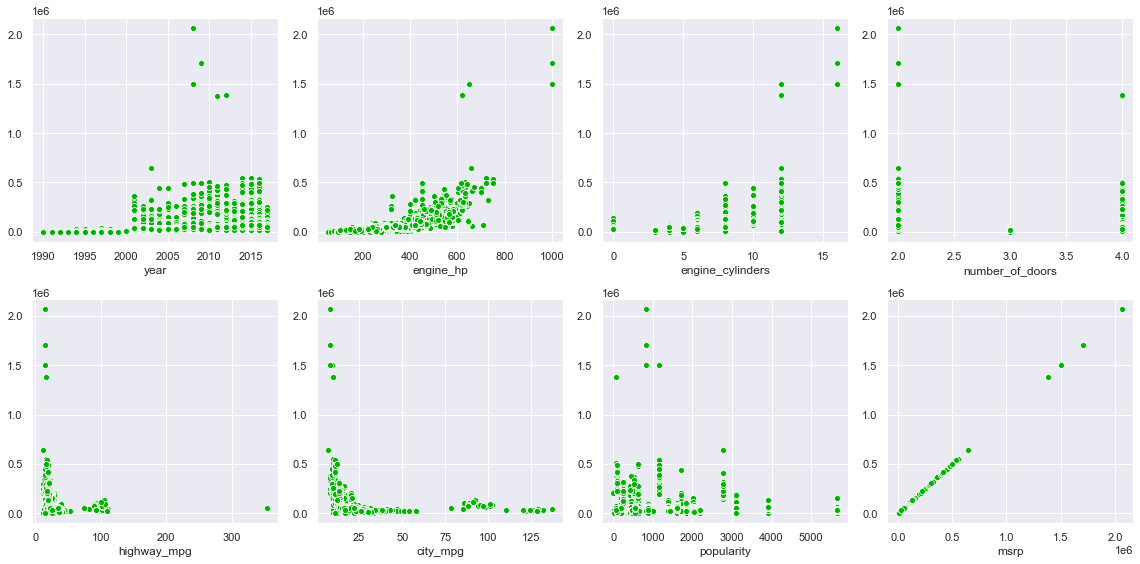

In [100]:
nrows = 2
ncols = 4

i = 0
fig, ax = plt.subplots(nrows, ncols, figsize = (16,8))
for row in range(nrows):
    for col in range(ncols):
        sns.scatterplot(df[numerical].iloc[:, i],df['msrp'],ax = ax[row, col],color = '#00b300' ).set(ylabel = '')
        plt.tight_layout()
        i += 1      

## Hubungan Variabel Kategorik dengan Variabel Dependen "MSRP"

In [34]:
"""Creating a function for ordering the groups in a column as per their frequency"""
def sort_order(column):
    orders = (df.groupby([column]).mean().sort_values(by ='msrp', ascending = False)).index
    return orders

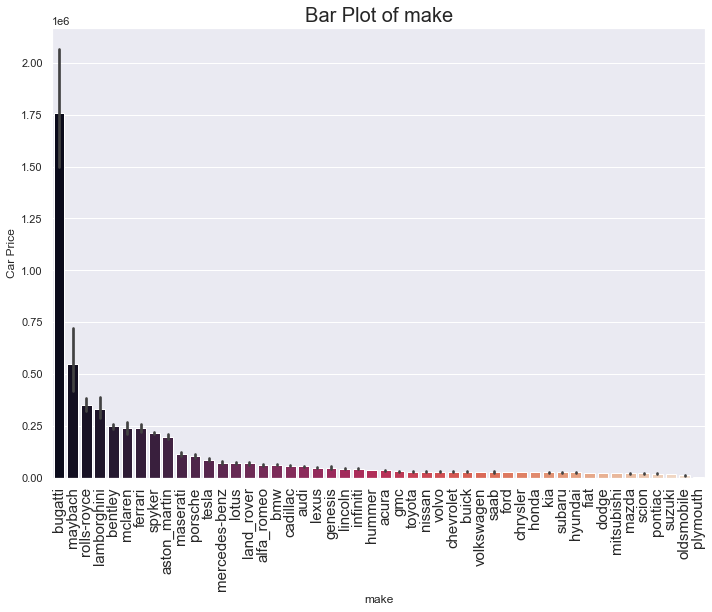

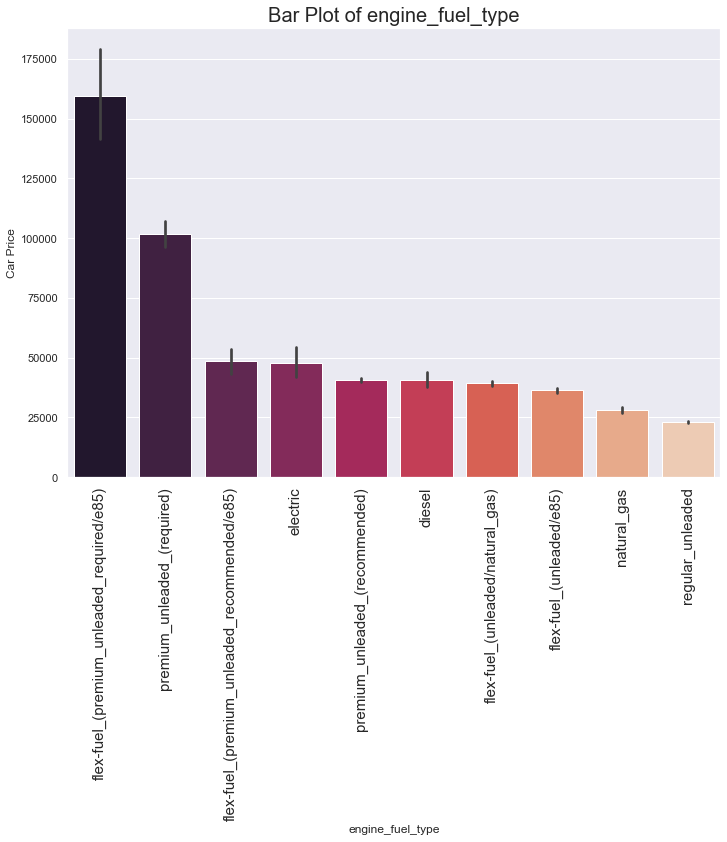

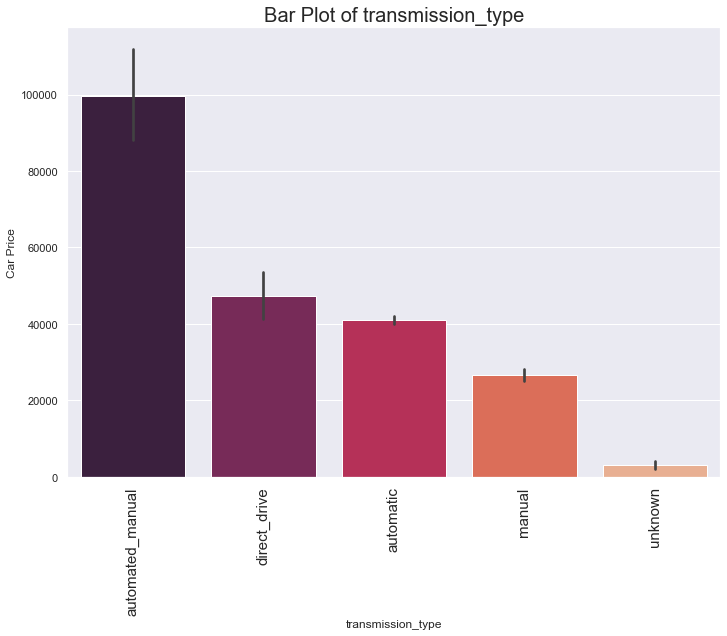

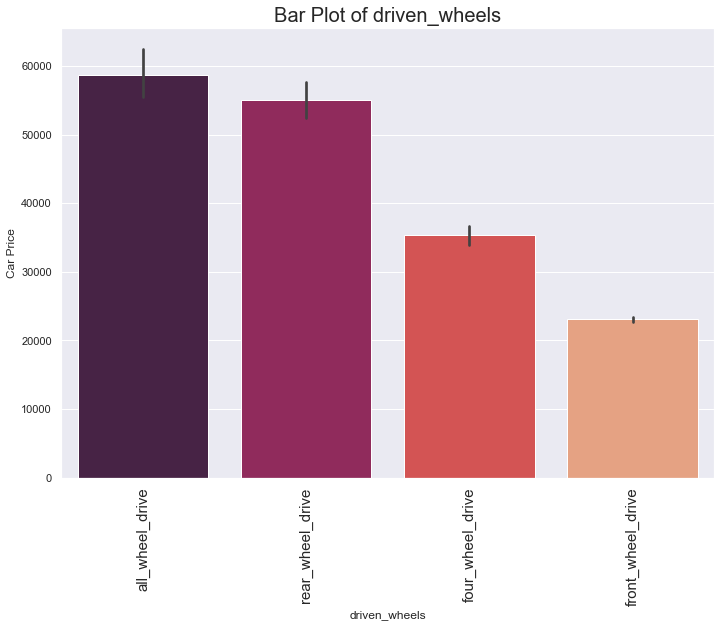

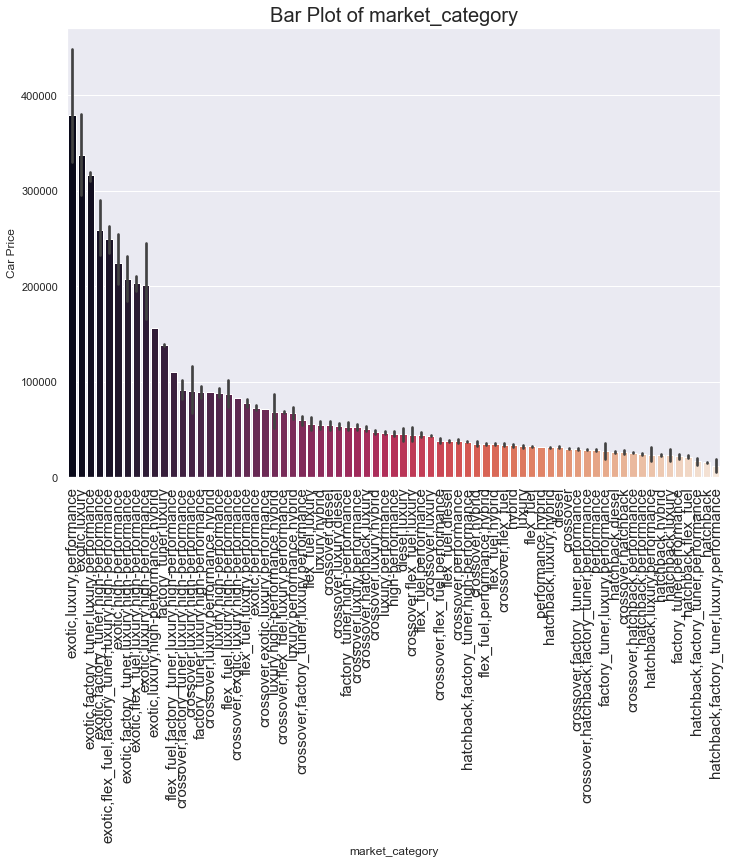

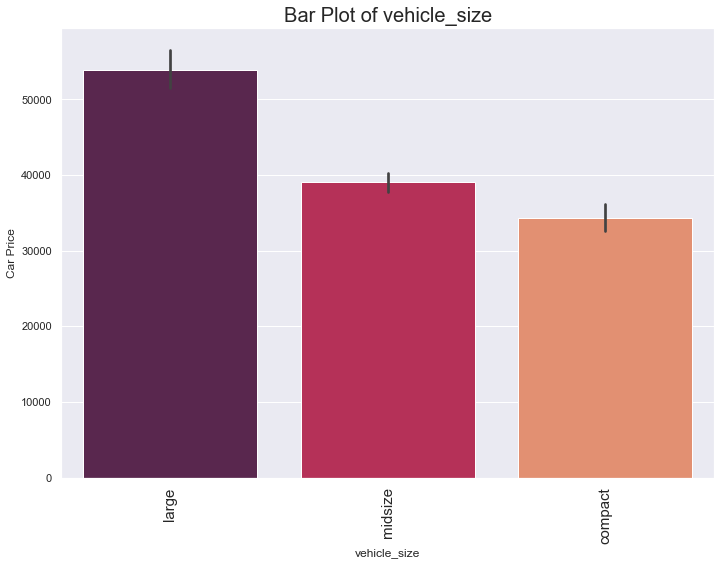

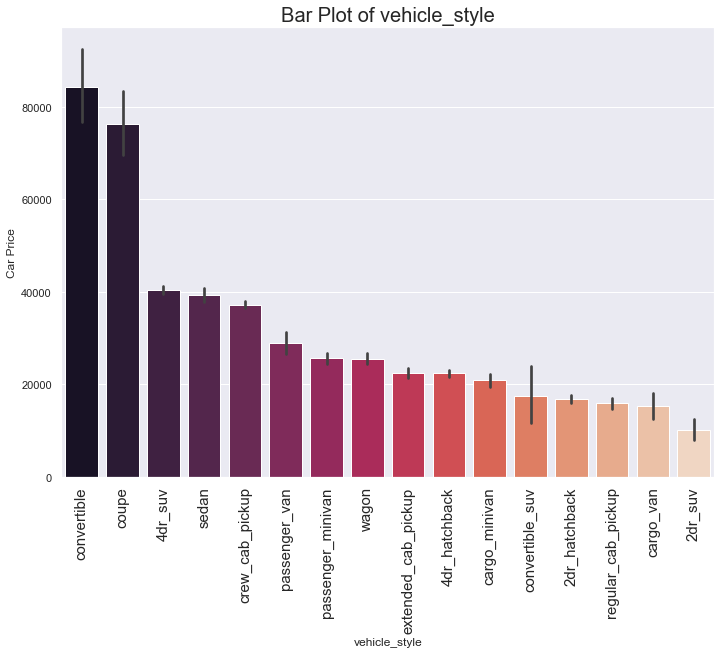

In [35]:
"""Looping over categorical variables to check the Price over different Groups"""
for i in categorical:
    if df[i].nunique() < 72:
        sns.barplot(df[i],df['msrp'], order = sort_order(i), palette='rocket')
        plt.title("Bar Plot of %s" %i, fontsize = 20)
        plt.xticks(fontsize = 12)
        plt.xlabel("%s"%i)
        plt.ylabel("Car Price")
        plt.xticks(fontsize = 15, rotation = 90)
        plt.show();
        print('\n')

In [107]:
df.groupby([i]).mean().sort_values(by ='msrp', ascending = False)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
vehicle_style,,,,,,,,
convertible,2011.035309,313.129887,6.245902,2.005044,25.788146,18.051702,1484.073140,84224.284994
coupe,2009.254335,328.972750,6.537364,2.028099,25.714286,17.757225,1558.639141,76248.322048
4dr_suv,2013.104502,262.882709,5.638520,4.000000,24.492765,18.466238,1307.565916,40421.871785
sedan,2010.812664,239.962865,5.263123,4.000000,30.238517,21.659449,1318.766732,39270.689633
crew_cab_pickup,2013.402349,301.258443,6.879589,4.000000,21.057269,15.629956,2002.149780,37220.466960
passenger_van,2011.023438,255.117188,6.937500,3.000000,17.179688,12.523438,3756.109375,29015.203125
passenger_minivan,2007.673861,212.997573,5.625899,3.827338,23.561151,16.956835,1879.323741,25621.050360
wagon,2008.597973,200.306644,4.871622,4.000000,28.354730,21.597973,1619.175676,25557.939189
extended_cab_pickup,2007.911717,242.179775,6.396469,3.471910,20.136437,15.324238,2077.489567,22488.776886


## Instant EDA

Kita bisa melakukan EDA, secara cepat dan simpel untuk memperoleh gambaran data kita secara keseluruhan dengan mudah. Disini kita akan menggunakan modul [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling).

In [8]:
# Install pandas-profiling, atau bisa menggunakan anaconda
# !pip install pandas-profiling

from pandas_profiling import ProfileReport

In [49]:
# Membuat instance dengan ProfileReport()
df_profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [50]:
# Menampilkan report dari pandas-profiling di notebook secara langsung. 
# Proses ini berlangsung lama, tergantung kompleksitas data

df_profile.to_widgets()

In [9]:
# Membuat output pandas-profiling ke ekstensi html
df_profile.to_file("profile_car_feature.html")

# Menangani Missing Values

Mari kita isi missing value. Sebelumnya kita cek kembali variabel apa saja yang null

In [9]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [10]:
# tipe data tiap variabel

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
# Mengambil variabel yang terdapat missing value

sum_null = df.isnull().sum()
null_variable = sum_null[sum_null>0].index.tolist()
null_variable

['engine_fuel_type',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'market_category']

In [12]:
# Cek nilai unik pada variabel missing value

for i in null_variable:
    print("Variable : " + i + "\n")
    print(df[i].unique())
    print("Total unik : " + str(len(df[i].unique())))
    print("\n")

Variable : engine_fuel_type

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)' nan]
Total unik : 11


Variable : engine_hp

[ 335.  300.  230.  320.  172.  160.  130.  158.  240.  248.  162.  217.
  184.  295.  115.  140.  155.  114.  100.  241.  180.  177.  228.  121.
  148.  194.  218.  161.  292.  250.  255.  222.   82.  134.  306.  400.
  425.  350.  332.  268.  282.  275.  201.  442.  562.  597.  237.  270.
  445.  443.  302.  322.  315.   nan  101.  135.  485.  238.  515.  543.
  631.  604.  620.  611.  661.  157.  402.  389.  110.  532.  170.  165.
  125.  641.  535.  153.  144.  188.  372.  108.  168.  190.  205.  200.
  227.  173.  220.  210.  280.  207.  265.  260.  290.  285.  390.  225.
  185.  150.  430.  520.  560.  475.  500.  540.  370.  580.  420.  

Kita bisa mengisi missing value dengan berbagai cara. Bisa menggunakan nilai konstan tertentu, atau nilai dengan nilai rata-rata, median ataupun modus nya. Kita juga bisa menggunakan algoritma dari KNN atau algoritma lain untuk mengisi missing value. 

Pada umumnya, kita bisa mengisi variabel numerik dengan nilai mean atau median. Sedangka untuk variabel kategori kita isi dengan nilai modusnya. Jika nilai kosong memang memiliki arti nilai kosong, maka biasanya kita isi dengan nilai konstan 0 untuk variabel numerik atau string null untuk variabel kategori

## Mengisi Missing Value dengan Pandas

In [13]:
df_copy = df.copy()

"""Kita menggunakan modus untuk mengisi missing value pada variabel kategori"""
df_copy['market_category'].fillna(df['market_category'].mode()[0], inplace = True)
df_copy['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0], inplace = True)
   

"""Kita menggunakan rata-rata untuk mengisi missing value pada variabel numerik"""
df_copy['engine_hp'].fillna(df['engine_hp'].mean(), inplace = True)

"""Kita menggunakan median untuk mengisi missing value pada variabel numerik bertipe ordinal"""
df_copy['engine_cylinders'].fillna(df['engine_cylinders'].median(), inplace = True)
df_copy['number_of_doors'].fillna(df['number_of_doors'].median(), inplace = True)

"""Checking Missing Values after imputing """
display(df_copy.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('rocket'))

,Variables,Missing Values
0,make,0
1,model,0
2,year,0
3,engine_fuel_type,0
4,engine_hp,0
5,engine_cylinders,0
6,transmission_type,0
7,driven_wheels,0
8,number_of_doors,0
9,market_category,0


## Mengisi missing value menggunakan Sklearn SimpleImputer

In [14]:
from sklearn.impute import SimpleImputer

# df_copy = df.copy()

""" Mengisi missing value pada variabel kategori """

imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(df[['market_category', 'engine_fuel_type']])
df[['market_category', 'engine_fuel_type']] = imputer.transform(df[['market_category', 'engine_fuel_type']])

""" Mengisi missing value pada variabel numerik """

imputer = SimpleImputer(strategy='mean', 
                        missing_values=np.nan)
imputer = imputer.fit(df[['engine_hp']])
df[['engine_hp']] = imputer.transform(df[['engine_hp']])

""" Mengisi missing value pada variabel numerik ordinal """

imputer = SimpleImputer(strategy='median', 
                        missing_values=np.nan)
imputer = imputer.fit(df[['engine_cylinders', 'number_of_doors']])
df[['engine_cylinders', 'number_of_doors']] = imputer.transform(df[['engine_cylinders', 'number_of_doors']])


"""Checking Missing Values after imputing """
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('rocket'))


,Variables,Missing Values
0,make,0
1,model,0
2,year,0
3,engine_fuel_type,0
4,engine_hp,0
5,engine_cylinders,0
6,transmission_type,0
7,driven_wheels,0
8,number_of_doors,0
9,market_category,0


# Mengecek Nilai Duplikat pada Dataset

In [15]:
""" Creating for duplicates """

display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 715'

In [16]:
""" Dropping the Duplicates """
df.drop_duplicates(inplace = True)

""" Checking the Duplicates again """
print("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

Total number of of Duplicates present in data: 0


In [17]:
df.shape

(11199, 16)

# Encoding pada Variabel Kategori

Encoding adalah salah satu tahap praproses data sebelum diproses dengan algoritma machine learning. Dalam mengerjakan projek data science ataupun machine learning, kita akan sangat mungkin menemukan satu atau beberapa fitur yang bertipe kategori, misalnya ‘Sangat Baik’, ‘Baik’, ‘Tidak Baik. Nah, komputer tidak dapat memproses data bertipe kategori sehingga kita harus mengubah data tersebut menjadi berbentuk bilangan. Proses ini disebut dengan encoding.

Data bertipe kategori bisa kita lakukan encoding dengan banyak cara. Beberapa yang umum diantaranya

1. Dummy Variabel
2. LabelEncoding 
3. One-Hot Encoder
4. OrdinalEncoder

Kita akan menggunakan dataset [<i>Cuaca DKI Jakarta</i>](https://github.com/hafidz-sani/Datasets/blob/main/3SD2_Dataset%2001_Cuaca%20DKI%20Jakarta.csv)

In [164]:
data = pd.read_csv("https://raw.githubusercontent.com/hafidz-sani/Datasets/main/3SD2_Dataset%2001_Cuaca%20DKI%20Jakarta.csv")

In [165]:
display(data.head(), data.tail())

,Suhu,Kelembaban Relatif,Tutupan Awan,PMSL,Label
0,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Turun Hujan
1,Suhu_Rendah,RH_Sedang,CC_Sangat Tinggi,PMSL_Rendah,Turun Hujan
2,Suhu_Rendah,RH_Tinggi,CC_Sangat Tinggi,PMSL_Sedang,Tidak Turun Hujan
3,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan
4,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Turun Hujan


,Suhu,Kelembaban Relatif,Tutupan Awan,PMSL,Label
494,Suhu_Rendah,RH_Rendah,CC_Sangat Tinggi,PMSL_Sedang,Turun Hujan
495,Suhu_Tinggi,RH_Rendah,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan
496,Suhu_Tinggi,RH_Rendah,CC_Sangat Tinggi,PMSL_Sedang,Tidak Turun Hujan
497,Suhu_Rendah,RH_Rendah,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan
498,Suhu_Rendah,RH_Rendah,CC_Sangat Tinggi,PMSL_Sedang,Tidak Turun Hujan


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Suhu                499 non-null    object
 1   Kelembaban Relatif  495 non-null    object
 2   Tutupan Awan        495 non-null    object
 3   PMSL                495 non-null    object
 4   Label               499 non-null    object
dtypes: object(5)
memory usage: 19.6+ KB


In [167]:
print("Total baris yang duplikat : %s" %data.duplicated().sum())

Total baris yang duplikat : 443


## Mengisi nilai missing value

Karena semua data bertipe kategori, misisng value akan kita isi dengan nilai modus nya.

In [168]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(data)
data.iloc[:,:] = imputer.transform(data)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Suhu                499 non-null    object
 1   Kelembaban Relatif  499 non-null    object
 2   Tutupan Awan        499 non-null    object
 3   PMSL                499 non-null    object
 4   Label               499 non-null    object
dtypes: object(5)
memory usage: 19.6+ KB


### Melihat countplot data kategori

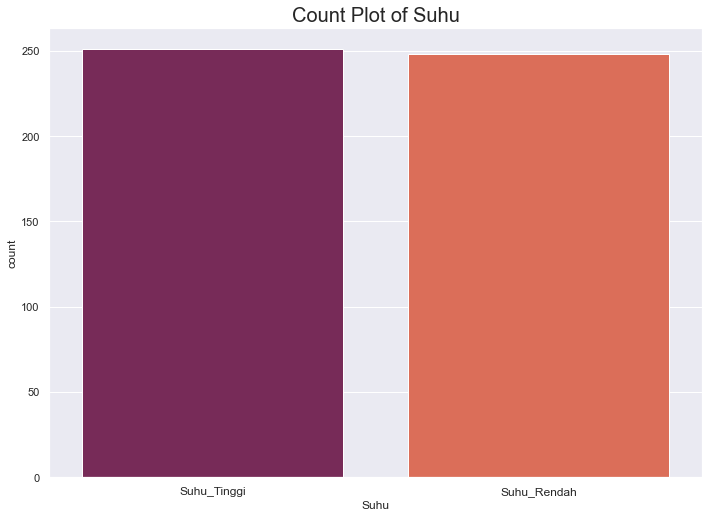

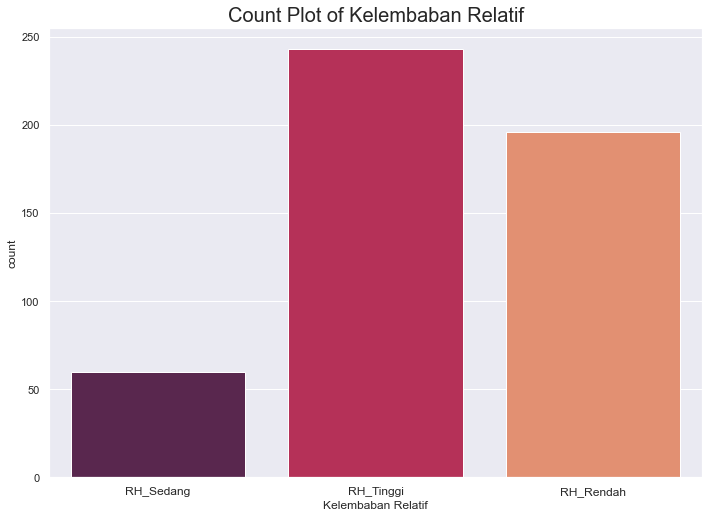

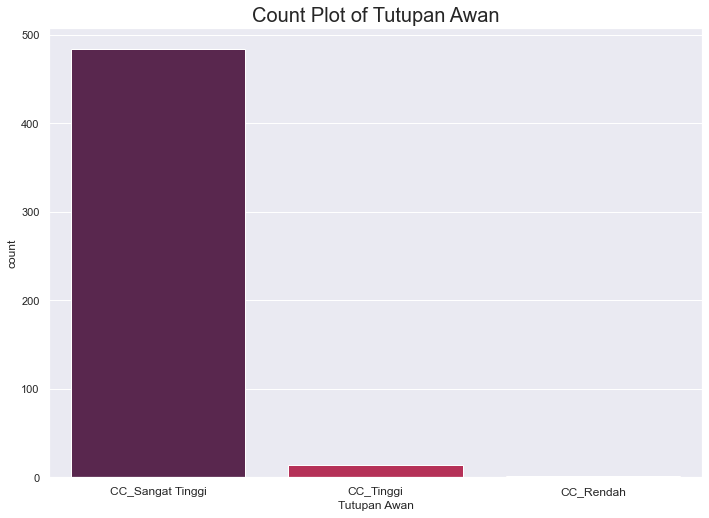

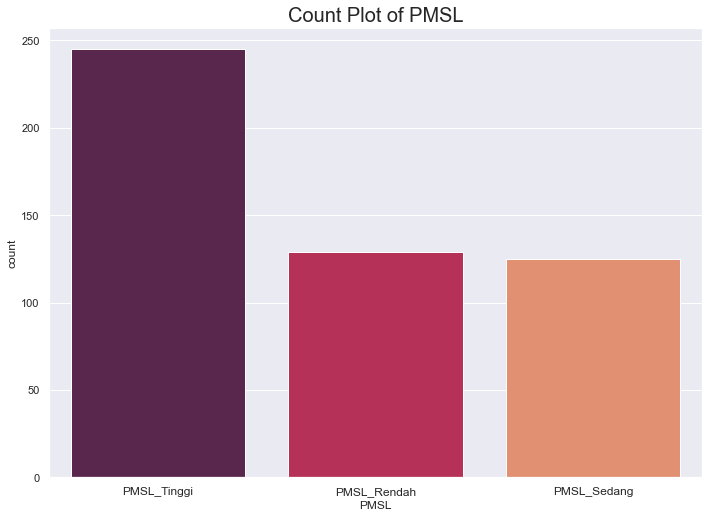

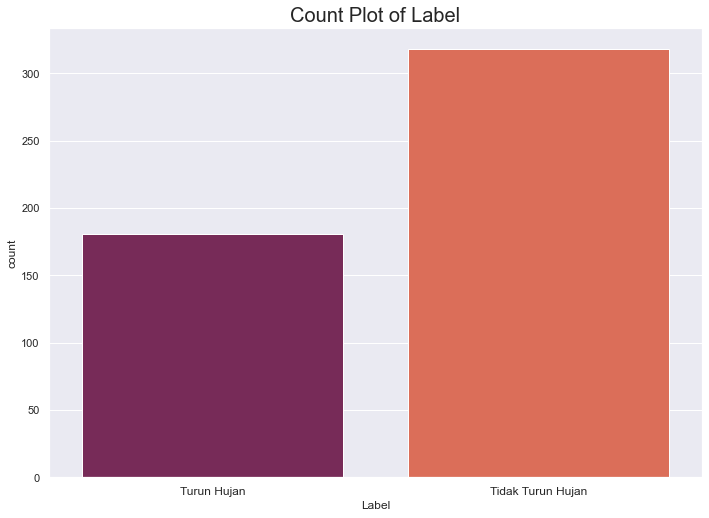

In [156]:
""" Looping untuk menampilkan countplot untuk semua variabel kategori """
for i in data.columns.tolist():
    sns.countplot(data[i], palette='rocket')
    plt.title("Count Plot of %s" %i, fontsize = 20)
    plt.xticks(fontsize = 12)
    plt.xlabel("%s" %i)
    plt.show();
    print('\n')

In [171]:
for i in data.columns.tolist():
    print("Variable : %s" %i)
    print(data[i].unique())
    print("Total unik : " + str(len(data[i].unique())))
    print("\n")      

Variable : Suhu
['Suhu_Tinggi' 'Suhu_Rendah']
Total unik : 2


Variable : Kelembaban Relatif
['RH_Sedang' 'RH_Tinggi' 'RH_Rendah']
Total unik : 3


Variable : Tutupan Awan
['CC_Sangat Tinggi' 'CC_Tinggi' 'CC_Rendah']
Total unik : 3


Variable : PMSL
['PMSL_Tinggi' 'PMSL_Rendah' 'PMSL_Sedang']
Total unik : 3


Variable : Label
['Turun Hujan' 'Tidak Turun Hujan']
Total unik : 2




## Dummy Variabel

pd.get_dummies() adalah fungsi dari Pandas yang melakukan encoding menggunakan dummy dalam satu baris kode. Biasanya digunakan untuk feature encoding, namun ini tidak direkomendasikan untuk digunakan dalam produksi ataupun kompetisi. 

Sumber : [Toward Data Science](https://towardsdatascience.com/stop-using-pandas-get-dummies-for-feature-encoding-5d2cd07cb4fc)

In [158]:
pd.get_dummies(data)

,Suhu_Suhu_Rendah,Suhu_Suhu_Tinggi,Kelembaban Relatif_RH_Rendah,Kelembaban Relatif_RH_Sedang,Kelembaban Relatif_RH_Tinggi,Tutupan Awan_CC_Rendah,Tutupan Awan_CC_Sangat Tinggi,Tutupan Awan_CC_Tinggi,PMSL_PMSL_Rendah,PMSL_PMSL_Sedang,PMSL_PMSL_Tinggi,Label_Tidak Turun Hujan,Label_Turun Hujan
0,0,1,0,1,0,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,1,0,1,0,0,0,1
2,1,0,0,0,1,0,1,0,0,1,0,1,0
3,0,1,0,1,0,0,1,0,0,0,1,1,0
4,0,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,0,1,0,0,0,1,0,0,1,0,0,1
495,0,1,1,0,0,0,1,0,0,0,1,1,0
496,0,1,1,0,0,0,1,0,0,1,0,1,0
497,1,0,1,0,0,0,1,0,0,0,1,1,0


## LabelEncoder

LabelEncoder bagus digunakan untuk encoding pada data label yg bertipe kategori.

Sumber: [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [172]:
# Import modul
from sklearn.preprocessing import LabelEncoder

# create instance of labelencoder
labelEncoder = LabelEncoder()

# Assigning numerical values and storing in another column
data['label'] = labelEncoder.fit_transform(data['Label'])

In [160]:
data

,Suhu,Kelembaban Relatif,Tutupan Awan,PMSL,Label,label
0,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Turun Hujan,1
1,Suhu_Rendah,RH_Sedang,CC_Sangat Tinggi,PMSL_Rendah,Turun Hujan,1
2,Suhu_Rendah,RH_Tinggi,CC_Sangat Tinggi,PMSL_Sedang,Tidak Turun Hujan,0
3,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan,0
4,Suhu_Tinggi,RH_Sedang,CC_Sangat Tinggi,PMSL_Tinggi,Turun Hujan,1
...,...,...,...,...,...,...
494,Suhu_Rendah,RH_Rendah,CC_Sangat Tinggi,PMSL_Sedang,Turun Hujan,1
495,Suhu_Tinggi,RH_Rendah,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan,0
496,Suhu_Tinggi,RH_Rendah,CC_Sangat Tinggi,PMSL_Sedang,Tidak Turun Hujan,0
497,Suhu_Rendah,RH_Rendah,CC_Sangat Tinggi,PMSL_Tinggi,Tidak Turun Hujan,0


Turun Hujan : 1
Tidak Turun Hujan : 0

## One-Hot Encoder

One-Hot Encoder baik digunakan pada variabel kategori dengan tipe nominal (Tidak terindikasi rank)

Sumber: [machinelearningmastery](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

In [119]:
# Import modul
from sklearn.preprocessing import OneHotEncoder

# Mengcopy dataset cuaca
data_copy = data.copy() 

# create instance of labelencoder
enc = OneHotEncoder(sparse=False)

# Melakukan fitting dan transform OneHotEncoder pada data_copy pada 4 kolom pertama.
enc = enc.fit_transform(data_copy.iloc[:,0:4])

# Membuat dataframe setelah melakukan encoding
enc_df = pd.DataFrame(enc)

In [120]:
enc_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
494,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
495,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
496,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
497,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Kelemahan dari OneHotEncoder memberikan kolom yang numerik yang membuat kita sulit membaca hasil encoding. Maka kita perlu melakukan manipulasi nama kolom agar kita bisa mudah melihat hasil encoding kita.

In [121]:
""" Mencari nilai unik kategori pada semua variabel kategori yang dilakukan onehotencoding """

kolom = data_copy.columns[0:4].tolist() # Membuat list dari nama kolom ['Suhu', 'Kelembaban Relatif', 'Tutupan Awan', 'PMSL']
dict = {}    # Menyimpan nilai unik kategori dengan key nama kolom
list = []    # menyimpan semua nilai unik kategori dari semua kolom

for i in kolom:
    dict[i] = data_copy[i].unique().tolist()
    for j in range(len(dict[i])):
        list.append(dict[i][j])
        
list

['Suhu_Tinggi',
 'Suhu_Rendah',
 'RH_Sedang',
 'RH_Tinggi',
 'RH_Rendah',
 'CC_Sangat Tinggi',
 'CC_Tinggi',
 'CC_Rendah',
 'PMSL_Tinggi',
 'PMSL_Rendah',
 'PMSL_Sedang']

In [122]:
enc_df.columns = list
enc_df

,Suhu_Tinggi,Suhu_Rendah,RH_Sedang,RH_Tinggi,RH_Rendah,CC_Sangat Tinggi,CC_Tinggi,CC_Rendah,PMSL_Tinggi,PMSL_Rendah,PMSL_Sedang
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
494,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
495,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
496,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
497,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [125]:
# Merge enc_df dengan Label

enc_df = pd.concat([enc_df, data_copy[['Label', 'label']]], axis=1, join="inner")

In [131]:
enc_df.head()

,Suhu_Tinggi,Suhu_Rendah,RH_Sedang,RH_Tinggi,RH_Rendah,CC_Sangat Tinggi,CC_Tinggi,CC_Rendah,PMSL_Tinggi,PMSL_Rendah,PMSL_Sedang,Label,label
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Turun Hujan,1
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Turun Hujan,1
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Tidak Turun Hujan,0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Tidak Turun Hujan,0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Turun Hujan,1


## Ordinal Encoder

OrdinalEncoder baik digunakan pada variabel kategori dengan tipe ordinal (terindikasi rank)

Sumber: [machinelearningmastery](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

In [173]:
# Import modul
from sklearn.preprocessing import OrdinalEncoder

data_baru = data.copy()

# create instance
oe = OrdinalEncoder()

# Melakukan fitting dan transform OrdinalEncoder pada data 4 kolom pertama.
data_baru.iloc[:, :-2] = oe.fit_transform(data_baru.iloc[:, :-2])

# Melihat data
data_baru

,Suhu,Kelembaban Relatif,Tutupan Awan,PMSL,Label,label
0,1.0,1.0,1.0,2.0,Turun Hujan,1
1,0.0,1.0,1.0,0.0,Turun Hujan,1
2,0.0,2.0,1.0,1.0,Tidak Turun Hujan,0
3,1.0,1.0,1.0,2.0,Tidak Turun Hujan,0
4,1.0,1.0,1.0,2.0,Turun Hujan,1
...,...,...,...,...,...,...
494,0.0,0.0,1.0,1.0,Turun Hujan,1
495,1.0,0.0,1.0,2.0,Tidak Turun Hujan,0
496,1.0,0.0,1.0,1.0,Tidak Turun Hujan,0
497,0.0,0.0,1.0,2.0,Tidak Turun Hujan,0


In [174]:
# Drop kolom label
data_baru.drop('Label', axis=1, inplace=True)

In [175]:
data_baru

,Suhu,Kelembaban Relatif,Tutupan Awan,PMSL,label
0,1.0,1.0,1.0,2.0,1
1,0.0,1.0,1.0,0.0,1
2,0.0,2.0,1.0,1.0,0
3,1.0,1.0,1.0,2.0,0
4,1.0,1.0,1.0,2.0,1
...,...,...,...,...,...
494,0.0,0.0,1.0,1.0,1
495,1.0,0.0,1.0,2.0,0
496,1.0,0.0,1.0,1.0,0
497,0.0,0.0,1.0,2.0,0


In [176]:
""" Nilai unik data """
for i in data.columns.tolist():
  print(data[i].unique().tolist())

['Suhu_Tinggi', 'Suhu_Rendah']
['RH_Sedang', 'RH_Tinggi', 'RH_Rendah']
['CC_Sangat Tinggi', 'CC_Tinggi', 'CC_Rendah']
['PMSL_Tinggi', 'PMSL_Rendah', 'PMSL_Sedang']
['Turun Hujan', 'Tidak Turun Hujan']
[1, 0]


In [177]:
""" Nilai unik data_baru """
for i in data_baru.columns.tolist():
  print(data_baru[i].unique().tolist())

[1.0, 0.0]
[1.0, 2.0, 0.0]
[1.0, 2.0, 0.0]
[2.0, 0.0, 1.0]
[1, 0]


# Data Transformation

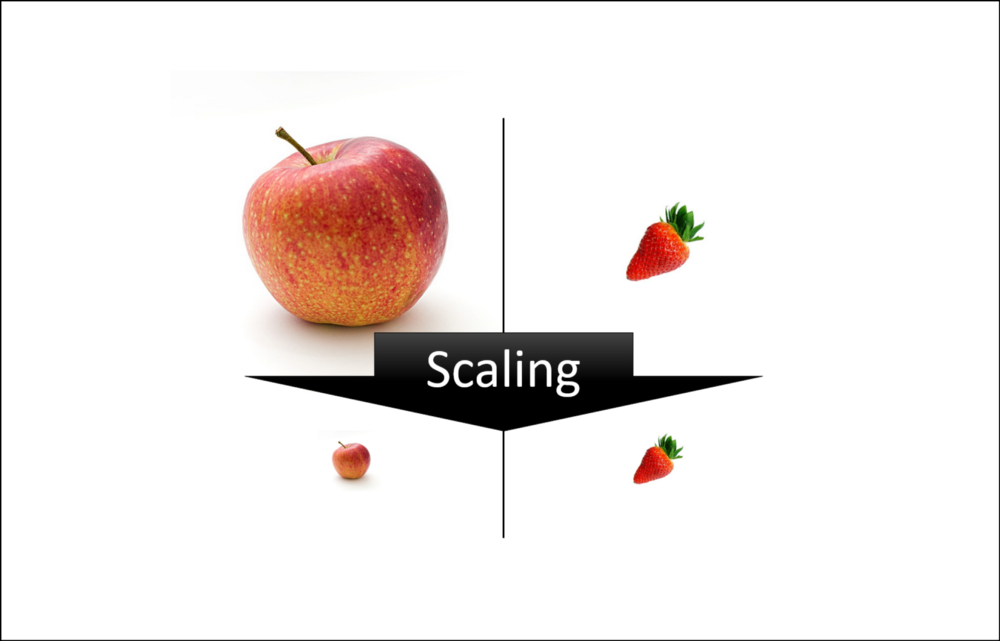

Transformasi Data adalah upaya yang dilakukan dengan tujuan utama untuk mengubah skala pengukuran data asli menjadi bentuk lain sehingga data dapat memenuhi asumsi-asumsi yang mendasari analisis ragam.

Data yang ditampilkan pada laporan anda tetap data aslinya sedangkan data transformasi hanya untuk membantu anda untuk membuat data asli memenuhi asumsi-asumsi analisis ragam.

Teknik yang paling sering dalam hal feature scaling adalah normalisasi dan standarisasi.<br>
Normalisasi digunakan ketika kita ingin mengikat nilai kita antara dua angka, biasanya, antara [0,1] atau [-1,1]. Sementara Standardisasi mengubah data menjadikan rata-rata 0 dan varians 1.

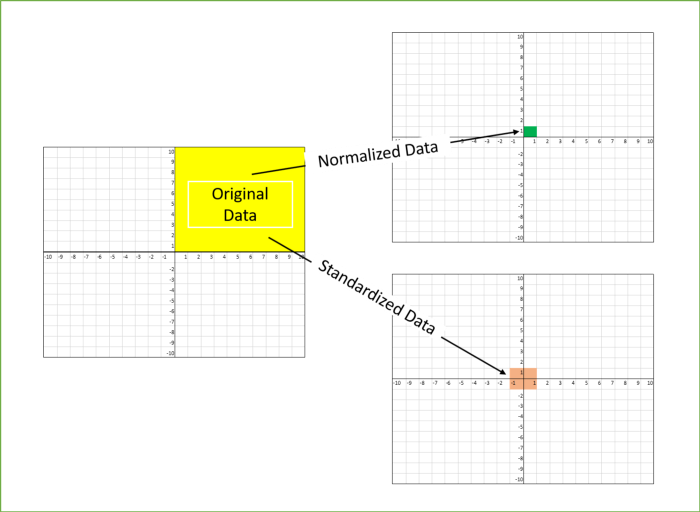

Berbagai teknik scaling sudah disediakan oleh Sklearn, diantaranya sebagai berikut :
1. Min Max Scaler
2. Standard Scaler
3. Power Transformer Scaler

Sumber: [TowardDataScience](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

In [182]:
dfn = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])

print(dfn)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


## MinMaxScaler

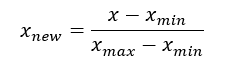

MinMaxScaler mentransformasikan fitur dengan menskalakan setiap fitur ke rentang tertentu. Misalnya [-1,1], [0,1], [0,5], dll. <br> 
Scaler ini merespon dengan baik jika standar deviasi kecil dan ketika distribusi tidak Gaussian. Scaler ini sensitif terhadap outlier.

In [187]:
# Import modul
from sklearn.preprocessing import MinMaxScaler

# Create instance
scaler = MinMaxScaler()

# fit_transform
dfn_minmax = pd.DataFrame(scaler.fit_transform(dfn), 
                         columns = ['WEIGHT', 'PRICE'],
                         index = ['Orange','Apple','Banana','Grape'])

In [188]:
dfn_minmax

,WEIGHT,PRICE
Orange,0.625,0.00
Apple,1.000,0.50
Banana,0.250,0.25
Grape,0.000,1.00


## StandardScaler

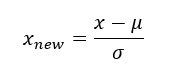

StandardScaler mengasumsikan data terdistribusi normal dalam setiap fitur dan menskalakannya sedemikian rupa sehingga distribusi berpusat di sekitar 0, dengan standar deviasi 1. Jika data tidak berdistribusi normal, maka scaler ini tidak baik digunakan.

In [189]:
# Import modul
from sklearn.preprocessing import StandardScaler

# Create instance
scaler = StandardScaler()

# fit_transform
dfn_standard = pd.DataFrame(scaler.fit_transform(dfn),
                            columns = ['WEIGHT', 'PRICE'],
                            index = ['Orange','Apple','Banana','Grape'])

In [190]:
dfn_standard

,WEIGHT,PRICE
Orange,0.412393,-1.183216
Apple,1.402136,0.169031
Banana,-0.577350,-0.507093
Grape,-1.237179,1.521278


## PowerTransformer Scaler

Power Transformer adalah scaler yang digunakan dengan tujuan agar distribusi peluang dari data mendekati Gaussian. Power Transformer optimal dalam menstabilkan varians dan meminimalkan skewness melalui Maximum Likelihood Estimator (MLE).

Saat ini, implementasi Sklearn dari PowerTransformer mendukung transformasi Box-Cox dan transformasi Yeo-Johnson. Parameter optimal untuk menstabilkan varians dan meminimalkan skewness diperkirakan melalui MLE. Box-Cox membutuhkan data input yang benar-benar positif, sementara Yeo-Johnson mendukung data positif atau negatif.

In [200]:
# Import modul
from sklearn.preprocessing import PowerTransformer

# Create instance
scaler = PowerTransformer(method='yeo-johnson')

# fit_transform
dfn_pt = pd.DataFrame(scaler.fit_transform(dfn),
                      columns = ['WEIGHT', 'PRICE'],
                      index = ['Orange','Apple','Banana','Grape'])

In [201]:
dfn_pt

,WEIGHT,PRICE
Orange,0.500180,-1.368084
Apple,1.324116,0.358244
Banana,-0.504405,-0.358249
Grape,-1.319891,1.368089


# Summary

1. Data Preprocessing penting dilakukan agar data bisa kita gunakan untuk analisis lebih lanjut serta untuk memenuhi asumsi-asumsi-asumsi yang diperlukan
2. EDA merupakan teknik yang sangat penting untuk memahami keadaan dan gambaran dari dataset kita agar mengetahui bagaimana data selanjutnya akan diproses.
3. Missing value dapat mengganggu analisis, maka perlu diatasi. Banyak cara, diantaranya bisa dihilangkan atau diisi dengan nilai konstan tertentu, atau diisi dengan nilai central tendency tiap variabel atau bisa juga dengan algoritma yang disediakan sklearn
4. Data kategori harus dilakukan encoding agar komputer bisa membaca dan mengkomputasi data kita. Bisa menggunakan dummy variabel atau algoritma dari sklearn seperti label encoder, one-hot encoder dan ordinal encoder